## Import relevant Libraries

In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Read all files

In [2]:
# Major file, inside here we have id_major	id_university	type	major_name	capacity columns
majors = pd.read_csv('./files/majors.csv')
print(majors.isna().sum()) #check for some null 
majors.sample(5) # get 5 random sample

Unnamed: 0       0
id_major         0
id_university    0
type             0
major_name       0
capacity         0
dtype: int64


,Unnamed: 0,id_major,id_university,type,major_name,capacity
438,438,3211015,321,science,PENDIDIKAN DOKTER,72
1080,1080,3861025,386,science,TEKNIK LINGKUNGAN,28
1030,1030,3821287,382,science,DESAIN INTERIOR,24
2764,2764,5412102,541,humanities,PEND. PANCASILA DAN KEWARGANEGARAAN,32
2523,2523,3722107,372,humanities,HUBUNGAN INTERNASIONAL,68


In [3]:
# we have id_university and the name of the university 
universities = pd.read_csv('./files/universities.csv')
print(universities.isna().sum()) #check some null 
universities.sample(5) # get 5 random sample

Unnamed: 0         0
id_university      0
university_name    0
dtype: int64


,Unnamed: 0,id_university,university_name
54,54,384,UNIVERSITAS TRUNOJOYO MADURA
46,46,365,UNIVERSITAS ISLAM NEGERI SUNAN KALIJAGA
33,33,341,INSTITUT PERTANIAN BOGOR
58,58,521,UNIVERSITAS PALANGKARAYA
2,2,113,UNIVERSITAS TEUKU UMAR


In [4]:
# in here we have all the test score from humanities
score_humanities = pd.read_csv('./files/score_humanities.csv')
print(score_humanities.isna().sum()) #check some null 
score_humanities.sample(5) # get 5 random sample

Unnamed: 0              0
id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
id_user                 0
score_eko               0
score_geo               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
score_sej               0
score_sos               0
dtype: int64


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
37534,37534,3342316,334,3342324,334,227230,383,556,423,541,440,603,452,385,687
7133,7133,3512084,351,3512111,351,53510,572,564,606,603,474,396,629,701,725
49270,49270,3832366,383,3862311,386,281135,481,481,393,351,502,538,365,333,506
51620,51620,3562393,356,3562242,356,289610,591,608,543,649,608,547,542,609,529
59313,59313,3222133,322,3362077,336,320134,485,575,616,515,488,562,473,512,535


In [5]:
# we have all the test score from science
score_science = pd.read_csv('./files/score_science.csv')
print(score_science.isna().sum()) #check some null 
score_science.sample(5) # get 5 random sample

Unnamed: 0              0
id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
id_user                 0
score_bio               0
score_fis               0
score_kim               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
dtype: int64


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
58881,58881,3531313,353,3631144,363,235124,616,600,576,532,498,658,505,586
81982,81982,3331206,333,3341104,334,320982,519,566,410,559,611,468,510,687
64245,64245,3361082,336,3421035,342,254963,444,572,542,670,623,570,589,573
35059,35059,3551221,355,3721197,372,146744,614,585,585,605,593,392,594,526
44413,44413,1711052,171,1711284,171,187738,485,441,563,674,616,648,434,670


## Merge Files

there is no missing data in any of these files, so we can continue to merge some files

In [6]:
major_univ = pd.merge(left=universities[['id_university','university_name']],right=majors[['id_major','major_name','id_university','capacity']],on='id_university')
major_univ # we have merged our data, so it will be easier to be read

,id_university,university_name,id_major,major_name,capacity
0,111,UNIVERSITAS SYIAH KUALA,1111014,PENDIDIKAN DOKTER HEWAN,88
1,111,UNIVERSITAS SYIAH KUALA,1111022,TEKNIK SIPIL,64
2,111,UNIVERSITAS SYIAH KUALA,1111037,TEKNIK MESIN,48
3,111,UNIVERSITAS SYIAH KUALA,1111045,TEKNIK KIMIA,48
4,111,UNIVERSITAS SYIAH KUALA,1111053,ARSITEKTUR,48
...,...,...,...,...,...
3162,921,UNIVERSITAS PAPUA,9212011,EKONOMI PEMBANGUNAN,32
3163,921,UNIVERSITAS PAPUA,9212042,MANAJEMEN,32
3164,921,UNIVERSITAS PAPUA,9212057,AKUNTANSI,32
3165,921,UNIVERSITAS PAPUA,9212065,PENDIDIKAN BAHASA INDONESIA,16


for science data

In [7]:
df_science = pd.merge(left=score_science,right=major_univ,left_on=['id_first_major','id_first_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) # merge first major and first university
df_science = df_science.rename(columns={'university_name':'first_univ','major_name':'first_major','capacity':'first_capacity'}).drop(['id_university','id_major'],axis=1) # then rename the columns name that have been merged and also drop the id
df_science = pd.merge(left=df_science,right=major_univ,left_on=['id_second_major','id_second_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) #  now second major and second university
df_science = df_science.rename(columns={'university_name':'second_univ','major_name':'second_major','capacity':'second_capacity'}).drop(['id_university','id_major','Unnamed: 0','id_first_major','id_first_university','id_second_major','id_second_university','id_user'],axis=1) # same like before

In [8]:
df_science # now we can just use a single file to get all of the information

,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,400,400,400,400,400,400,400,400,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
1,704,447,630,561,518,541,585,599,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
2,715,532,633,579,732,804,402,608,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
3,446,511,400,548,679,567,513,538,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
4,489,533,367,481,487,544,499,469,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86223,336,466,476,511,378,393,589,470,UNIVERSITAS NEGERI GORONTALO,PENDIDIKAN GEOGRAFI,54,UNIVERSITAS NEGERI GORONTALO,PENDIDIKAN ILMU PENGETAHUAN ALAM,27
86224,520,483,654,545,606,722,425,495,UNIVERSITAS BORNEO TARAKAN,AKUAKULTUR,48,UNIVERSITAS BORNEO TARAKAN,AGRIBISNIS,48
86225,435,413,441,408,516,526,564,390,UNIVERSITAS SYIAH KUALA,AGROTEKNOLOGI (PSDKU GAYO LUES),20,UNIVERSITAS SYIAH KUALA,KEHUTANAN (PSDKU GAYO LUES),16
86226,482,516,453,546,569,597,587,633,UNIVERSITAS PALANGKARAYA,KIMIA,30,UNIVERSITAS PALANGKARAYA,FISIKA,30


In [9]:
# because the capacity of utbk is 40% from the maximum capacity so we need to change the capacity value
df_science['first_capacity'] = df_science['first_capacity'].apply(lambda x: int(x*40/100))
df_science['second_capacity'] = df_science['second_capacity'].apply(lambda x: int(x*40/100))

In [10]:
df_science['specialized_score']=df_science[['score_bio','score_fis','score_kim','score_mat']].mean(axis=1) #get avg score 
df_science['general_score'] = df_science[['score_kmb','score_kpu','score_kua','score_ppu']].mean(axis=1)  #get avg score
df_science['average_score'] = df_science.iloc[:,:8].mean(axis=1) # avg score

In [11]:
df_science.columns.values #df science columns

array(['score_bio', 'score_fis', 'score_kim', 'score_kmb', 'score_kpu',
       'score_kua', 'score_mat', 'score_ppu', 'first_univ', 'first_major',
       'first_capacity', 'second_univ', 'second_major', 'second_capacity',
       'specialized_score', 'general_score', 'average_score'],
      dtype=object)

In [12]:
df_science = df_science[['score_bio', 'score_fis', 'score_kim','score_mat', 'score_kmb', 'score_kpu','score_kua', 'score_ppu','specialized_score','general_score','average_score','first_univ', 'first_major','first_capacity', 'second_univ', 'second_major', 'second_capacity']] #rearrange columns index 

In [13]:
df_science.head()

,score_bio,score_fis,score_kim,score_mat,score_kmb,score_kpu,score_kua,score_ppu,specialized_score,general_score,average_score,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,400,400,400,400,400,400,400,400,400.0,400.00,400.000,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
1,704,447,630,585,561,518,541,599,591.5,554.75,573.125,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
2,715,532,633,402,579,732,804,608,570.5,680.75,625.625,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
3,446,511,400,513,548,679,567,538,467.5,583.00,525.250,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
4,489,533,367,499,481,487,544,469,472.0,495.25,483.625,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32


for humanities data

In [14]:
df_humanites = pd.merge(left=score_humanities,right=major_univ,left_on=['id_first_major','id_first_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) # merge first major and first university
df_humanites = df_humanites.rename(columns={'university_name':'first_univ','major_name':'first_major','capacity':'first_capacity'}).drop(['id_university','id_major'],axis=1) # then rename the columns name that have been merged and also drop the id
df_humanites = pd.merge(left=df_humanites,right=major_univ,left_on=['id_second_major','id_second_university'],right_on=['id_major','id_university'],suffixes=('_left','_right')) #  now second major and second university
df_humanites = df_humanites.rename(columns={'university_name':'second_univ','major_name':'second_major','capacity':'second_capacity'}).drop(['id_university','id_major','Unnamed: 0','id_first_major','id_first_university','id_second_major','id_second_university','id_user'],axis=1) # same like before

In [15]:
df_humanites.head(3)

,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,778,486,679,594,643,686,559,392,676,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,30
1,803,638,659,696,685,494,576,676,694,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,30
2,601,560,575,611,629,509,607,775,629,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),100,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,30


In [16]:
# because the capacity of utbk is 40% from the maximum capacity so we need to change the capacity value
df_humanites['first_capacity'] = df_humanites['first_capacity'].apply(lambda x: int(x*40/100))
df_humanites['second_capacity'] = df_humanites['second_capacity'].apply(lambda x: int(x*40/100))

In [17]:
df_humanites.columns

Index(['score_eko', 'score_geo', 'score_kmb', 'score_kpu', 'score_kua',
       'score_mat', 'score_ppu', 'score_sej', 'score_sos', 'first_univ',
       'first_major', 'first_capacity', 'second_univ', 'second_major',
       'second_capacity'],
      dtype='object')

In [18]:
df_humanites['specialized_score']=df_humanites[['score_eko','score_geo','score_sej','score_sos']].mean(axis=1) #get avg score 
df_humanites['general_score'] = df_humanites[['score_kmb','score_kpu','score_kua','score_ppu','score_mat']].mean(axis=1)  #get avg score
df_humanites['average_score'] = df_humanites.iloc[:,:8].mean(axis=1) # avg score

In [19]:
df_humanites = df_humanites[['score_eko', 'score_geo', 'score_sej','score_sos','score_mat', 'score_kmb', 'score_kpu','score_kua', 'score_ppu','specialized_score','general_score','average_score','first_univ', 'first_major','first_capacity', 'second_univ', 'second_major', 'second_capacity']] #rearrange columns index 

In [20]:
df_humanites.head()

,score_eko,score_geo,score_sej,score_sos,score_mat,score_kmb,score_kpu,score_kua,score_ppu,specialized_score,general_score,average_score,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,778,486,392,676,686,679,594,643,559,583.00,632.2,602.125,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
1,803,638,676,694,494,659,696,685,576,702.75,622.0,653.375,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
2,601,560,775,629,509,575,611,629,607,641.25,586.2,608.375,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
3,612,494,617,548,548,524,549,589,508,567.75,543.6,555.125,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
4,493,573,474,560,641,586,582,504,608,525.00,584.2,557.625,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12


## visualization

In [21]:
#DF for science
df_science_first = df_science.drop(['second_univ',	'second_major',	'second_capacity'],axis=1).groupby('first_univ').size().sort_values(ascending=False).reset_index().head(10).rename(columns={0:'Total','first_univ':'Universities'})  #we only use first choice so we drop the second choices
df_humanites_first = df_humanites.drop(['second_univ',	'second_major',	'second_capacity'],axis=1).groupby('first_univ').size().sort_values(ascending=False).reset_index().head(10).rename(columns={0:'Total','first_univ':'Universities'}) #same as df_science

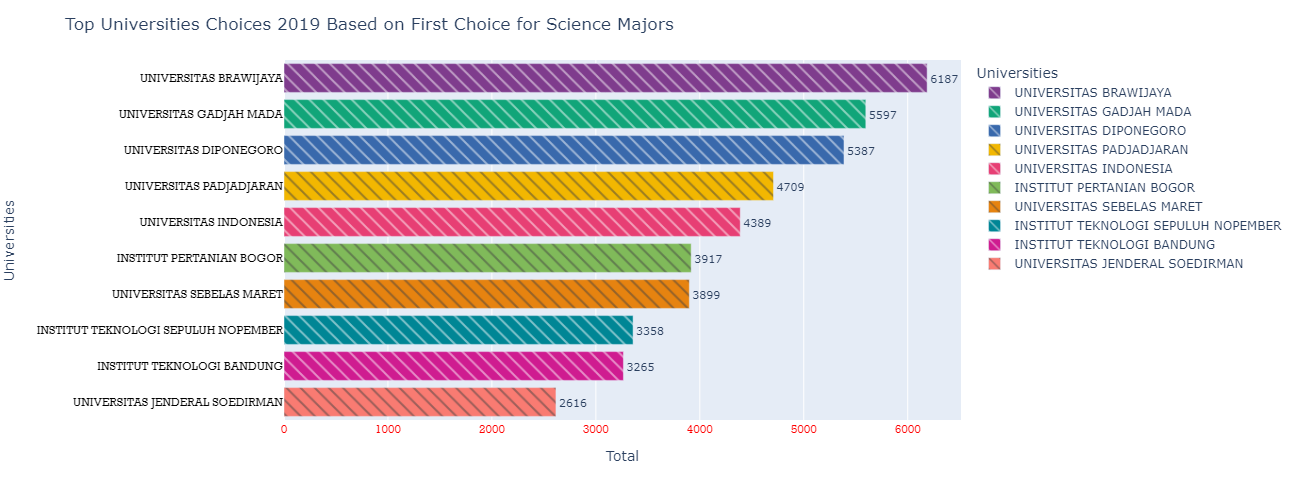

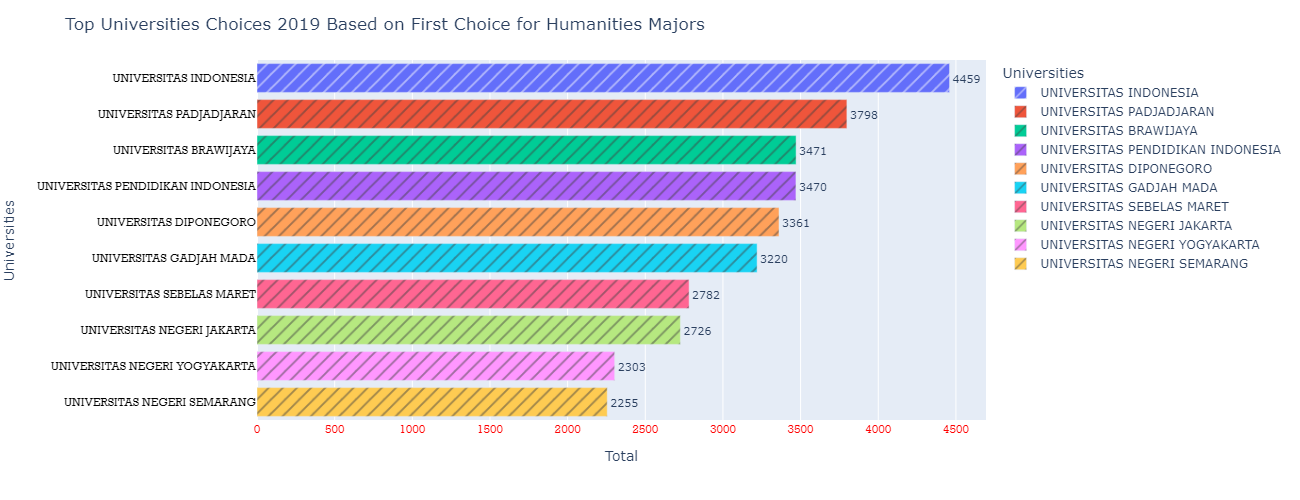

In [22]:
# Visualization using plotly

fig = px.bar(data_frame=df_science_first,y='Universities',x='Total',color='Universities',text_auto=True,pattern_shape_sequence=["\\"],width=1300, color_discrete_sequence=px.colors.qualitative.Bold) #dataframe using df_science_first, with x = column total and y = column Universities, text_auto = True -> show text, pattern_shape_sequence -> modify graph model
fig.update_layout(title='Top Universities Choices 2019 Based on First Choice for Science Majors') # title text
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=12)) # x label
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=12)) # y label
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True) #value text
fig.show('png') # we need to render the graph as png because github can't render html attribute

fig = px.bar(data_frame=df_humanites_first,y='Universities',x='Total',color='Universities',text_auto=True,pattern_shape_sequence=["/"],width=1300)
fig.update_layout(title='Top Universities Choices 2019 Based on First Choice for Humanities Majors')
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=12))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=12))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show('png') # we need to render the graph as png because github can't render html attribute

In [23]:
# new df for universitas brawijaya only based on first choices
df_univ_brawSc = df_science.loc[(df_science['first_univ']=='UNIVERSITAS BRAWIJAYA')].drop(['second_univ',	'second_major'	,'second_capacity'],axis=1) 
df_univ_brawHu = df_humanites.loc[(df_humanites['first_univ']=='UNIVERSITAS BRAWIJAYA')].drop(['second_univ',	'second_major'	,'second_capacity'],axis=1)

In [24]:
df_univ_brawSc_grouped_firstUniv = df_univ_brawSc.groupby('first_major').agg({'first_univ':'count','first_capacity':'mean'}).sort_values('first_univ',ascending=True).reset_index().rename(columns={'first_univ':'Total choices','first_capacity':'Capacity'}) # group by first major and count the columns first univ and mean the columns first_capacity then sort_values by first_univ ascending

df_univ_brawHu_grouped_firstUniv = df_univ_brawHu.groupby('first_major').agg({'first_univ':'count','first_capacity':'mean'}).sort_values('first_univ',ascending=True).reset_index().rename(columns={'first_univ':'Total choices','first_capacity':'Capacity'}) # same for humanities

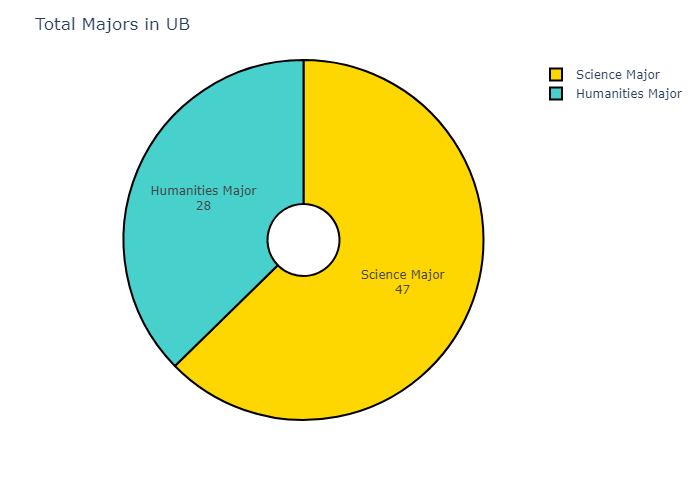

In [25]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(values=[len(df_univ_brawSc_grouped_firstUniv),len(df_univ_brawHu_grouped_firstUniv)],names=['Science Major','Humanities Major'],height=500,width=700,hole=.2) #pie graph
fig.update_traces(textposition='inside', textinfo='value+label',hoverinfo='label+percent',marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title='Total Majors in UB')
fig.show('png')

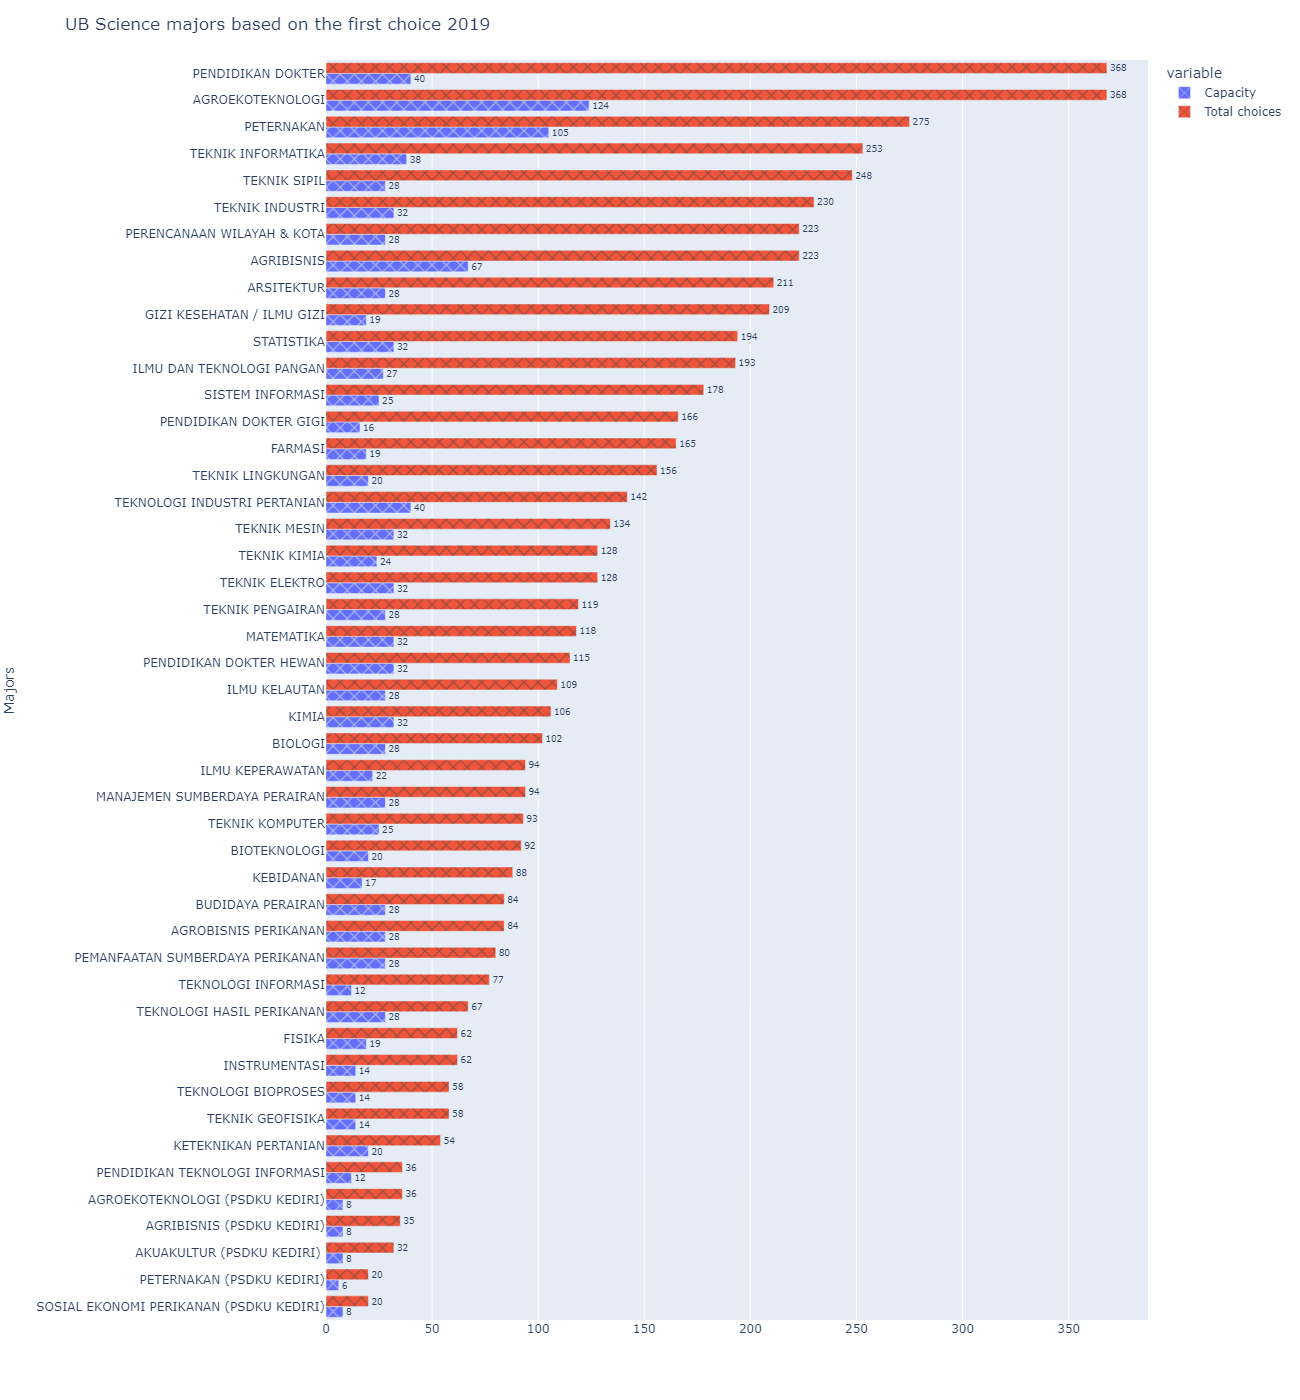

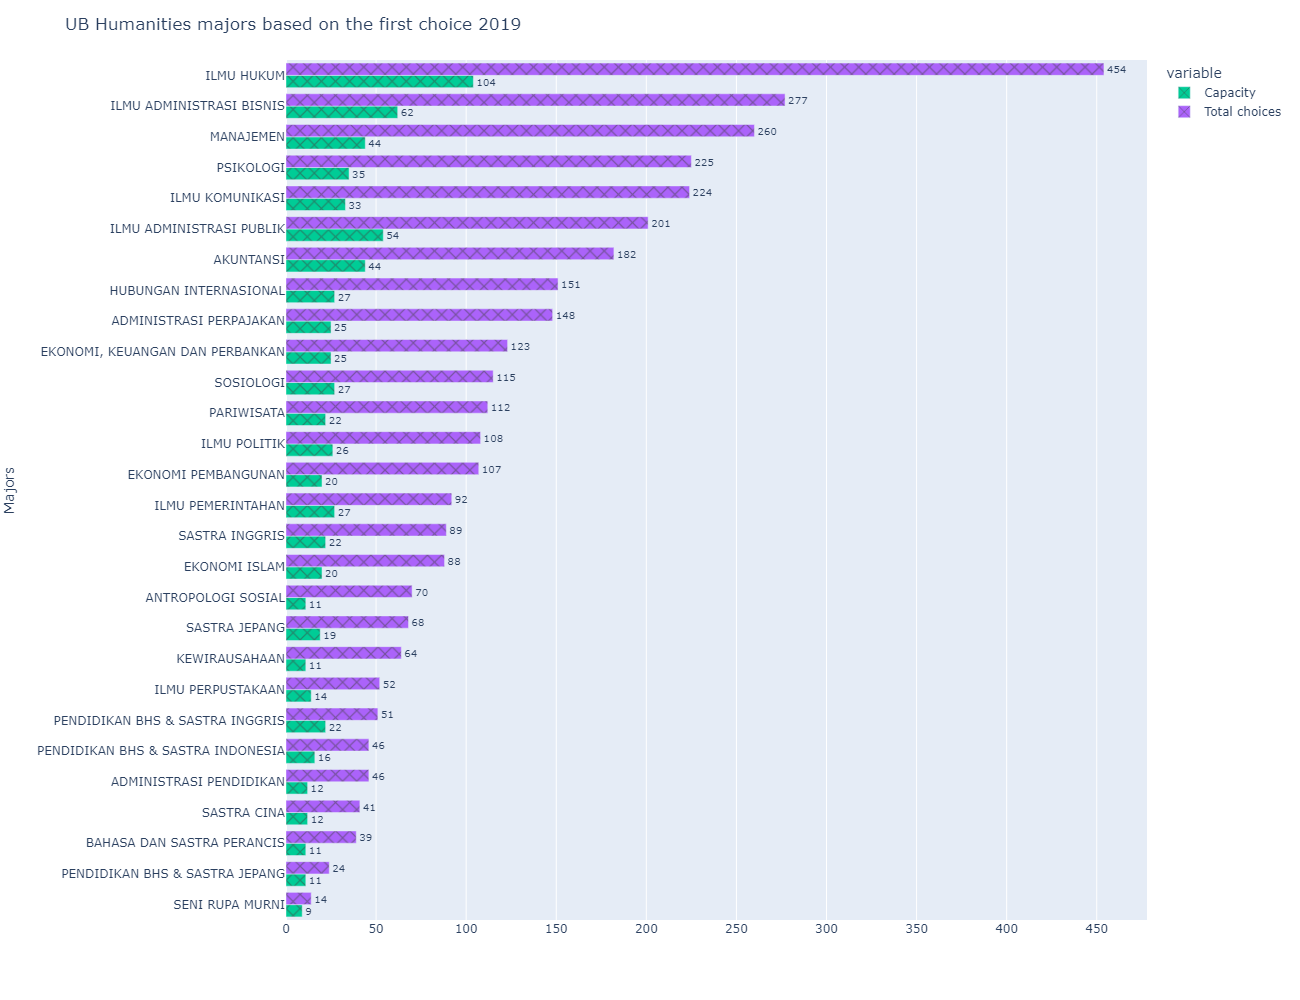

In [26]:
#science
fig = px.bar(data_frame=df_univ_brawSc_grouped_firstUniv,y='first_major',x=['Capacity','Total choices'],barmode='group',height=1400,width=1300,text_auto=True,pattern_shape_sequence=["x"],)
fig.update_layout(title='UB Science majors based on the first choice 2019',xaxis_title='',yaxis_title='Majors')
fig.update_traces(textfont_size=36, textangle=0, textposition="outside", cliponaxis=False)
fig.show('png')

#humanities
fig = px.bar(data_frame=df_univ_brawHu_grouped_firstUniv,y='first_major',x=['Capacity','Total choices'],barmode='group',height=1000,width=1300,text_auto=True,pattern_shape_sequence=["x"],color_discrete_map={
        'Total choicess': 'purple',
        'some_other_group': 'green'
    })
fig.update_layout(title='UB Humanities majors based on the first choice 2019',xaxis_title='',yaxis_title='Majors')
fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=True)
fig.show('png')

In [27]:
'''
percentage per majors 
using (capacity / total choices) * 100
'''
df_univ_brawSc_grouped_firstUniv['Percentage'] = (df_univ_brawSc_grouped_firstUniv['Capacity']/df_univ_brawSc_grouped_firstUniv['Total choices'])*100
df_univ_brawSc_grouped_firstUniv['Percentage'] = df_univ_brawSc_grouped_firstUniv['Percentage'].apply(lambda x: f"{x:.3f}")
df_univ_brawSc_grouped_firstUniv = df_univ_brawSc_grouped_firstUniv.sort_values('Percentage',ascending=True,ignore_index=True)
df_univ_brawHu_grouped_firstUniv['Percentage'] = (df_univ_brawHu_grouped_firstUniv['Capacity']/df_univ_brawHu_grouped_firstUniv['Total choices'])*100
df_univ_brawHu_grouped_firstUniv['Percentage'] = df_univ_brawHu_grouped_firstUniv['Percentage'].apply(lambda x: f"{x:.3f}")
df_univ_brawHu_grouped_firstUniv = df_univ_brawHu_grouped_firstUniv.sort_values('Percentage',ascending=True,ignore_index=True)

In [28]:
df_univ_brawSc_grouped_firstUniv.head(2)

,first_major,Total choices,Capacity,Percentage
0,PENDIDIKAN DOKTER,368,40.0,10.870
1,TEKNIK SIPIL,248,28.0,11.290


In [29]:
df_univ_brawHu_grouped_firstUniv.head(2)

,first_major,Total choices,Capacity,Percentage
0,ILMU KOMUNIKASI,224,33.0,14.732
1,PSIKOLOGI,225,35.0,15.556


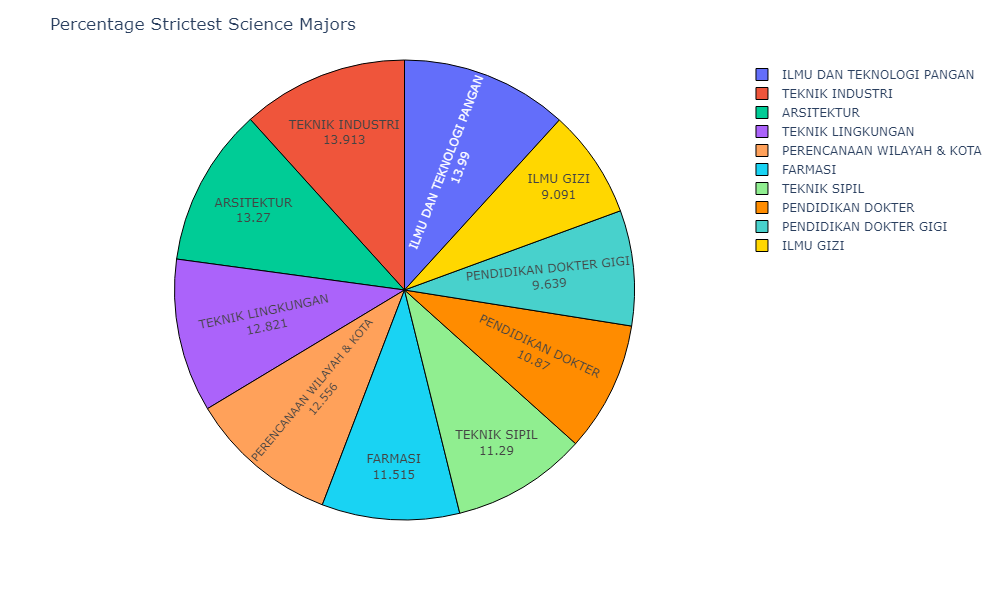

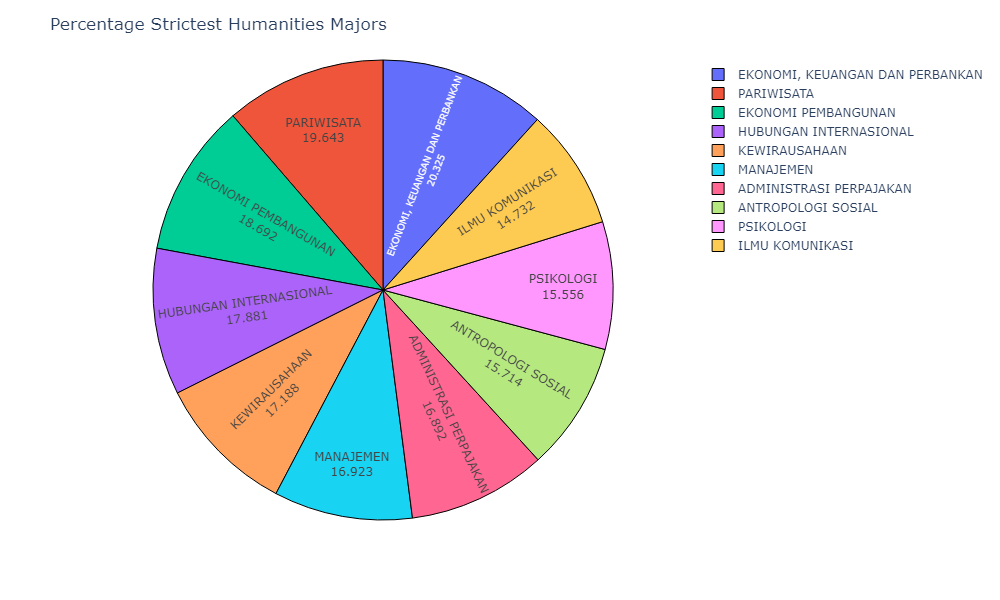

In [30]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(values=[9.091,9.639,10.870,11.290,11.515,12.556,12.821,13.270,13.913,13.990],names=['ILMU GIZI','PENDIDIKAN DOKTER GIGI','PENDIDIKAN DOKTER','TEKNIK SIPIL','FARMASI','PERENCANAAN WILAYAH & KOTA','TEKNIK LINGKUNGAN','ARSITEKTUR','TEKNIK INDUSTRI','ILMU DAN TEKNOLOGI PANGAN'],height=600,width=1000)
fig.update_traces(textposition='inside', textinfo='value+label',marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(title='Percentage Strictest Science Majors')
fig.show('png')

fig = px.pie(values=df_univ_brawHu_grouped_firstUniv['Percentage'].head(10),names=df_univ_brawHu_grouped_firstUniv['first_major'].head(10),height=600,width=1000)
fig.update_traces(textposition='inside', textinfo='value+label',marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title='Percentage Strictest Humanities Majors')
fig.show('png')

In [31]:
df_univ_brawSc.columns

Index(['score_bio', 'score_fis', 'score_kim', 'score_mat', 'score_kmb',
       'score_kpu', 'score_kua', 'score_ppu', 'specialized_score',
       'general_score', 'average_score', 'first_univ', 'first_major',
       'first_capacity'],
      dtype='object')

## Data Cleaning

In [32]:
# we make a function for participants that pass from selection
def participants_selection(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data = subdf['average_score'].iloc[:capacity]
        data_specialized_score = subdf['specialized_score'].iloc[:capacity]
        data_general_score = subdf['general_score'].iloc[:capacity]
        major = subdf['first_major'].iloc[:capacity]
        data = pd.concat([data_general_score,data_specialized_score,data,major,],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [33]:
df_univ_brawSc_clear = participants_selection(df_univ_brawSc)
df_univ_brawHm_clear = participants_selection(df_univ_brawHu)

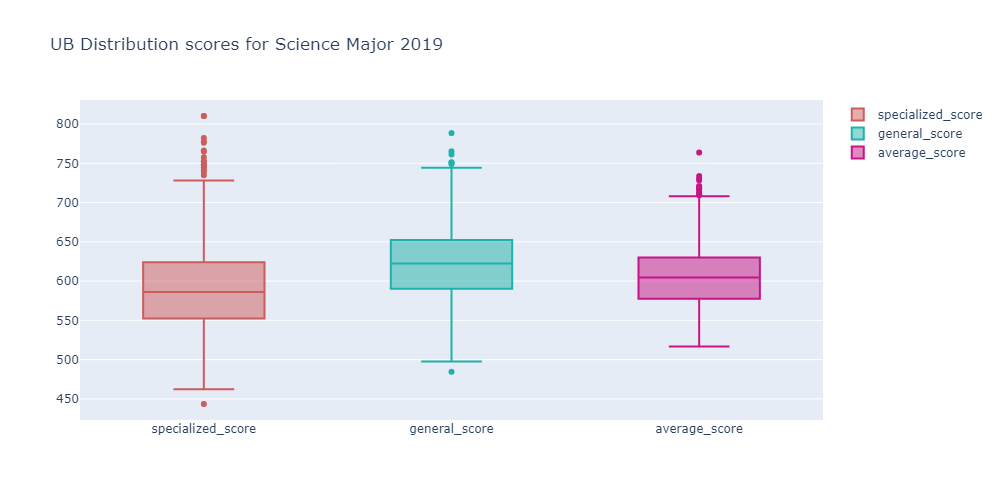

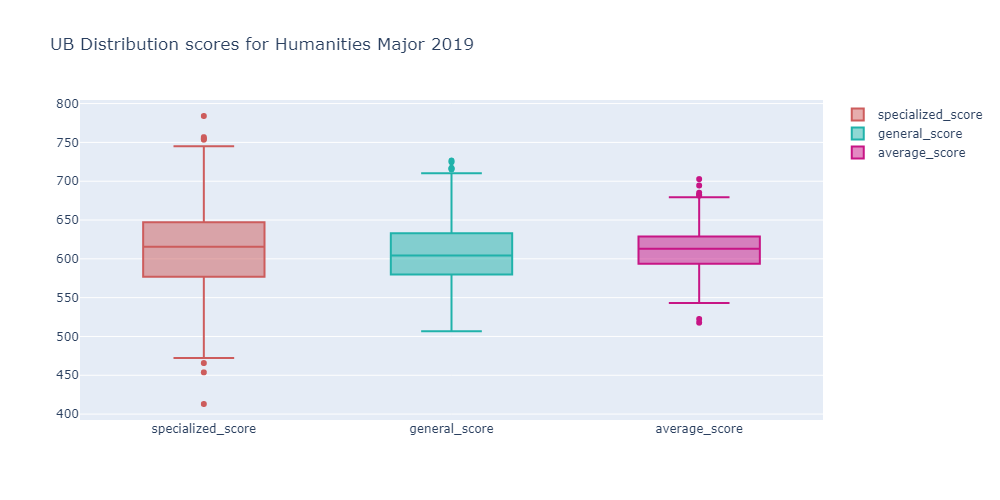

In [34]:
# make a distribution graph

fig = go.Figure()
fig.add_trace(go.Box(y=df_univ_brawSc_clear['specialized_score'], name='specialized_score',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_univ_brawSc_clear['general_score'], name = 'general_score',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df_univ_brawSc_clear['average_score'], name = 'average_score',
                marker_color = 'mediumvioletred'))
fig.update_layout(title_text='UB Distribution scores for Science Major 2019',width=1000)
fig.show('png')

fig = go.Figure()
fig.add_trace(go.Box(y=df_univ_brawHm_clear['specialized_score'], name='specialized_score',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_univ_brawHm_clear['general_score'], name = 'general_score',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df_univ_brawHm_clear['average_score'], name = 'average_score',
                marker_color = 'mediumvioletred'))
fig.update_layout(title_text='UB Distribution scores for Humanities Major 2019',width=1000)
fig.show('png')

In [35]:
df_humanites.head()

,score_eko,score_geo,score_sej,score_sos,score_mat,score_kmb,score_kpu,score_kua,score_ppu,specialized_score,general_score,average_score,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,778,486,392,676,686,679,594,643,559,583.00,632.2,602.125,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
1,803,638,676,694,494,659,696,685,576,702.75,622.0,653.375,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
2,601,560,775,629,509,575,611,629,607,641.25,586.2,608.375,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
3,612,494,617,548,548,524,549,589,508,567.75,543.6,555.125,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12
4,493,573,474,560,641,586,582,504,608,525.00,584.2,557.625,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),40,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL,12


In [36]:
df_science.head()

,score_bio,score_fis,score_kim,score_mat,score_kmb,score_kpu,score_kua,score_ppu,specialized_score,general_score,average_score,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,400,400,400,400,400,400,400,400,400.0,400.00,400.000,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
1,704,447,630,585,561,518,541,599,591.5,554.75,573.125,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
2,715,532,633,402,579,732,804,608,570.5,680.75,625.625,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
3,446,511,400,513,548,679,567,538,467.5,583.00,525.250,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
4,489,533,367,499,481,487,544,469,472.0,495.25,483.625,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32


In [37]:
# for sciences
def participants_selection2(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data = subdf['score_sej'].iloc[:capacity]
        data_score_eko = subdf['score_eko'].iloc[:capacity]
        data_score_geo = subdf['score_geo'].iloc[:capacity]
        data_score_mat = subdf['score_mat'].iloc[:capacity]
        data_score_kmb = subdf['score_kmb'].iloc[:capacity]
        data_score_kpu = subdf['score_kpu'].iloc[:capacity]
        data_score_kua = subdf['score_kua'].iloc[:capacity]
        data_score_ppu = subdf['score_ppu'].iloc[:capacity]
        major = subdf['score_sos'].iloc[:capacity]
        data = pd.concat([data_score_geo,data_score_eko,data,major,data_score_mat,data_score_kmb,data_score_kpu,data_score_ppu,data_score_kua],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [38]:
# for humanities
def participants_selection3(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data_score_bio = subdf['score_bio'].iloc[:capacity]
        data_score_fis = subdf['score_fis'].iloc[:capacity]
        data_score_kim = subdf['score_kim'].iloc[:capacity]
        data_score_mat = subdf['score_mat'].iloc[:capacity]
        data_score_kmb = subdf['score_kmb'].iloc[:capacity]
        data_score_kpu = subdf['score_kpu'].iloc[:capacity]
        data_score_kua = subdf['score_kua'].iloc[:capacity]
        data_score_ppu = subdf['score_ppu'].iloc[:capacity]
        data = pd.concat([data_score_kim,data_score_fis,data_score_bio,data_score_mat,data_score_kmb,data_score_kpu,data_score_ppu,data_score_kua],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [39]:
df_distHm = participants_selection2(df_humanites)
df_distSc = participants_selection3(df_science)

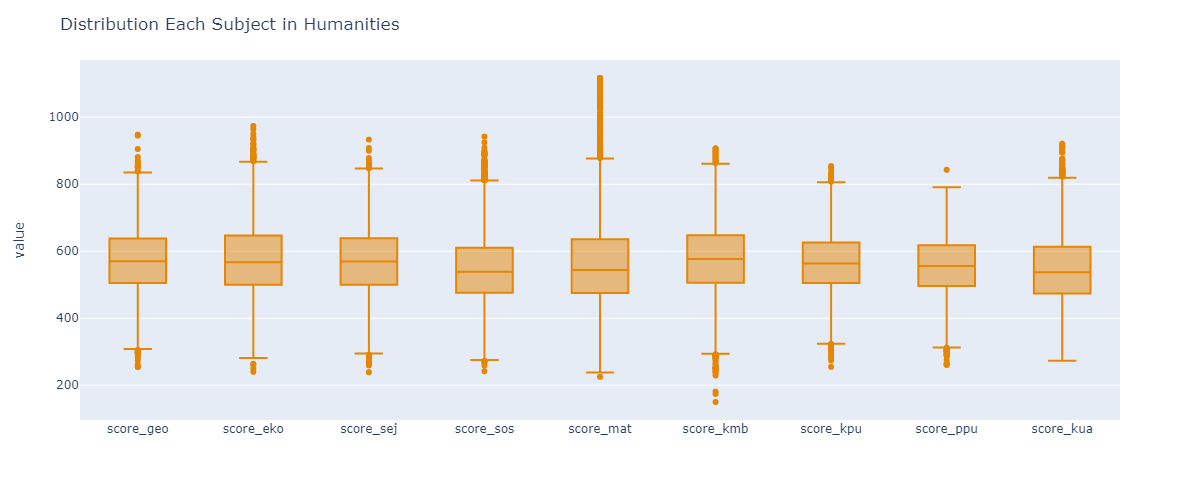

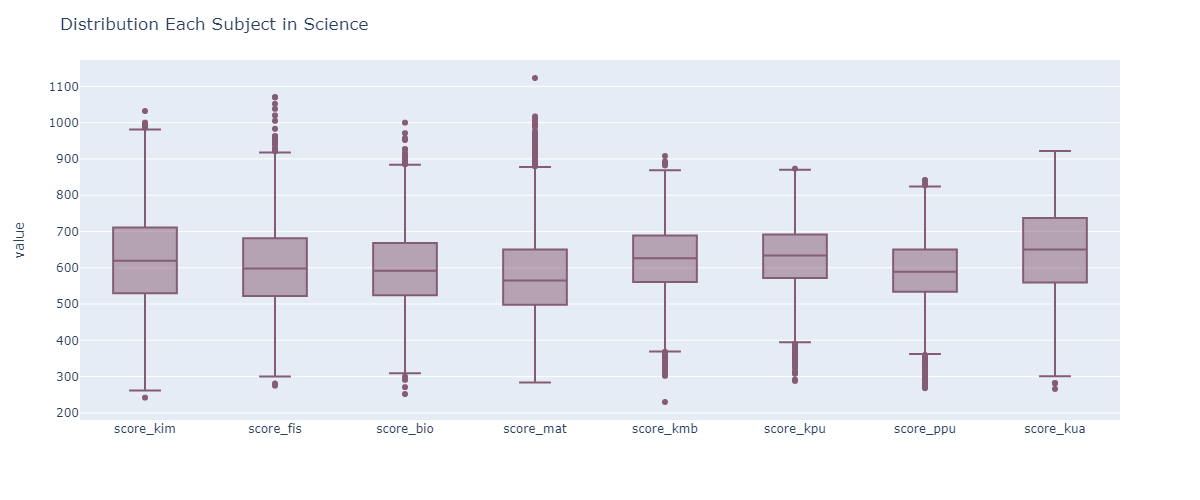

In [40]:
fig = px.box(data_frame=df_distHm,y=df_distHm.columns.values,color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Distribution Each Subject in Humanities',xaxis_title='',width=1200)
fig.show('png')

fig = px.box(data_frame=df_distSc,y=df_distSc.columns.values,color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='Distribution Each Subject in Science',xaxis_title='',width=1200)
fig.show('png')

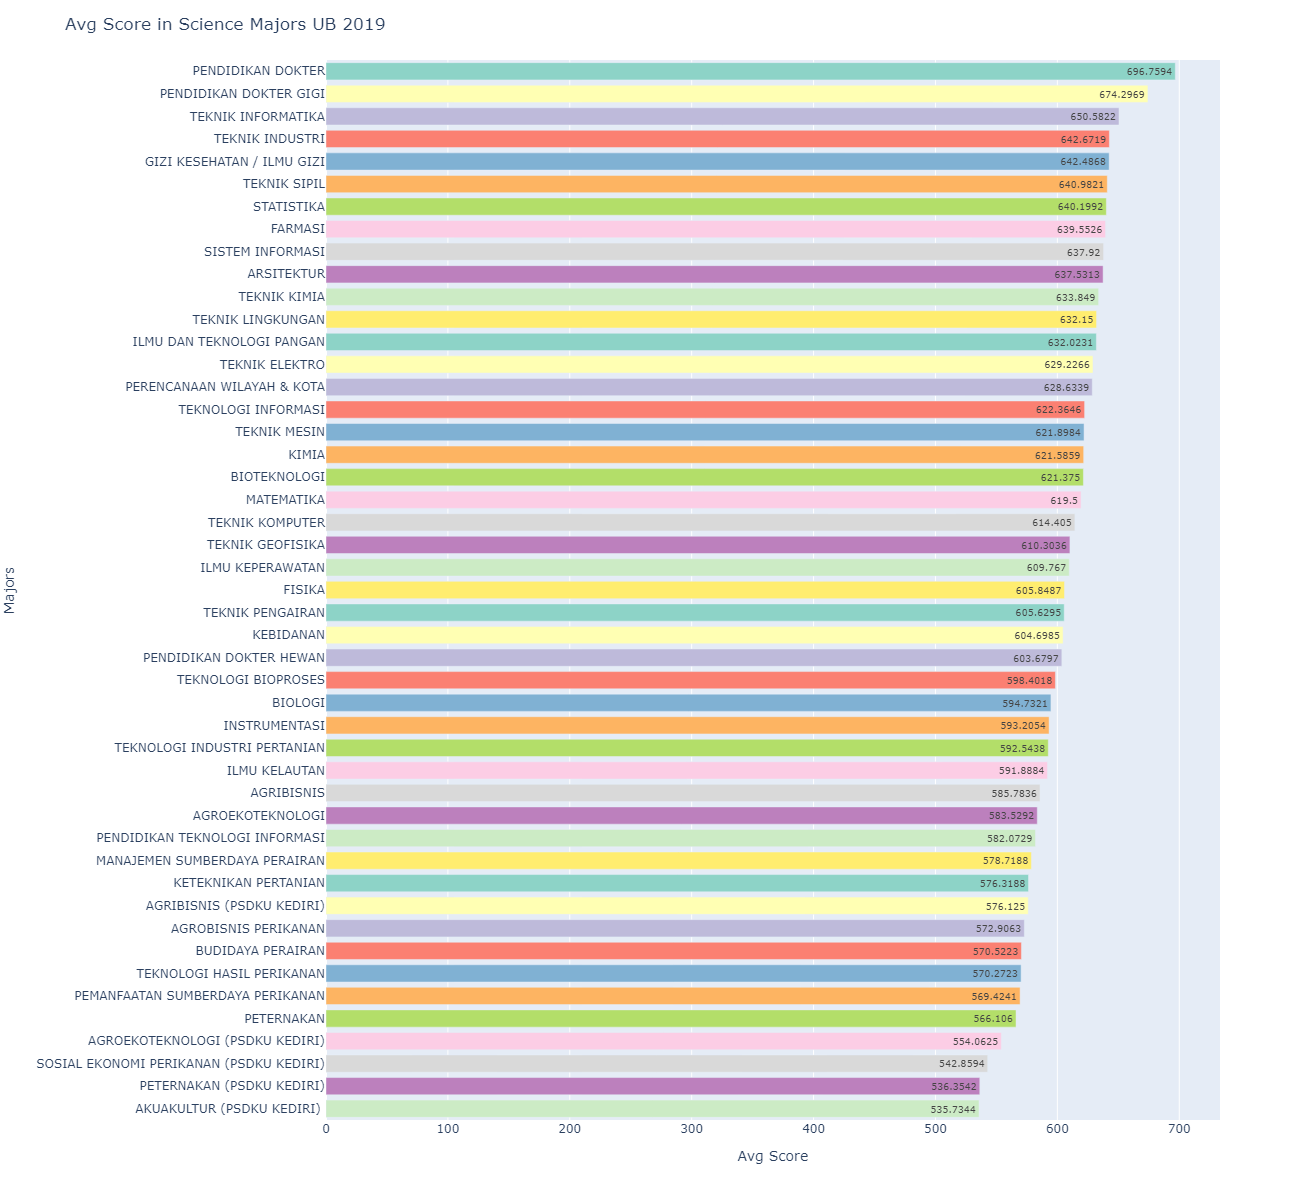

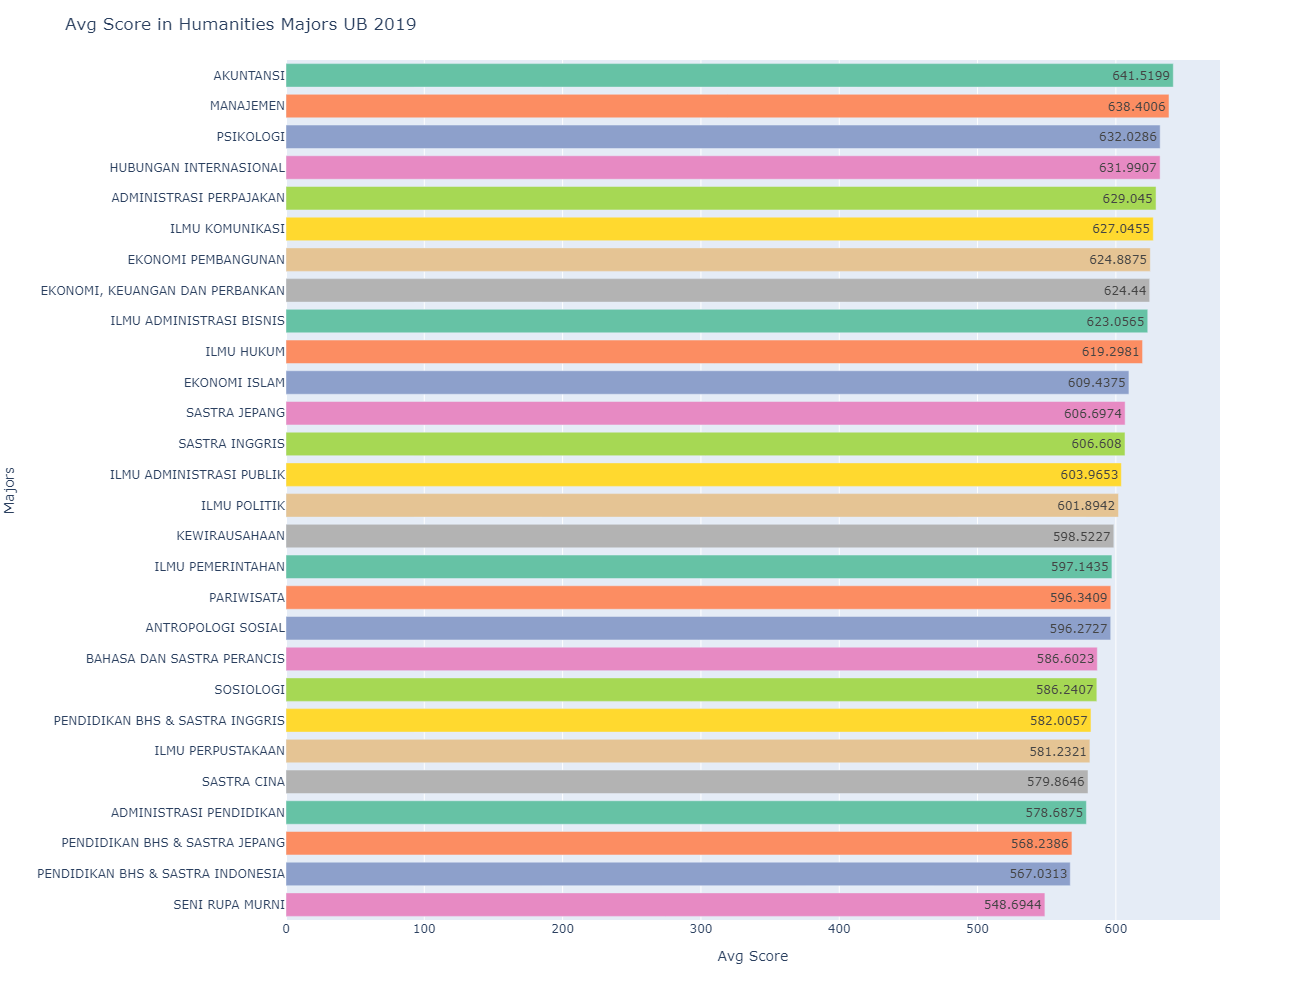

In [41]:
fig = px.bar(data_frame=df_univ_brawSc_clear.groupby('first_major').mean().reset_index().sort_values('average_score',ascending=False),x='average_score',y='first_major',color='first_major',height=1200,width=1300,text_auto=True,color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(showlegend=False,title='Avg Score in Science Majors UB 2019',xaxis_title='Avg Score',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1)
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=True)
fig.show('png')

fig = px.bar(data_frame=df_univ_brawHm_clear.groupby('first_major').mean().reset_index().sort_values('average_score',ascending=False),x='average_score',y='first_major',color='first_major',height=1000,width=1300,text_auto=True,color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(showlegend=False,title='Avg Score in Humanities Majors UB 2019',xaxis_title='Avg Score',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1)
# fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False)
fig.show('png')

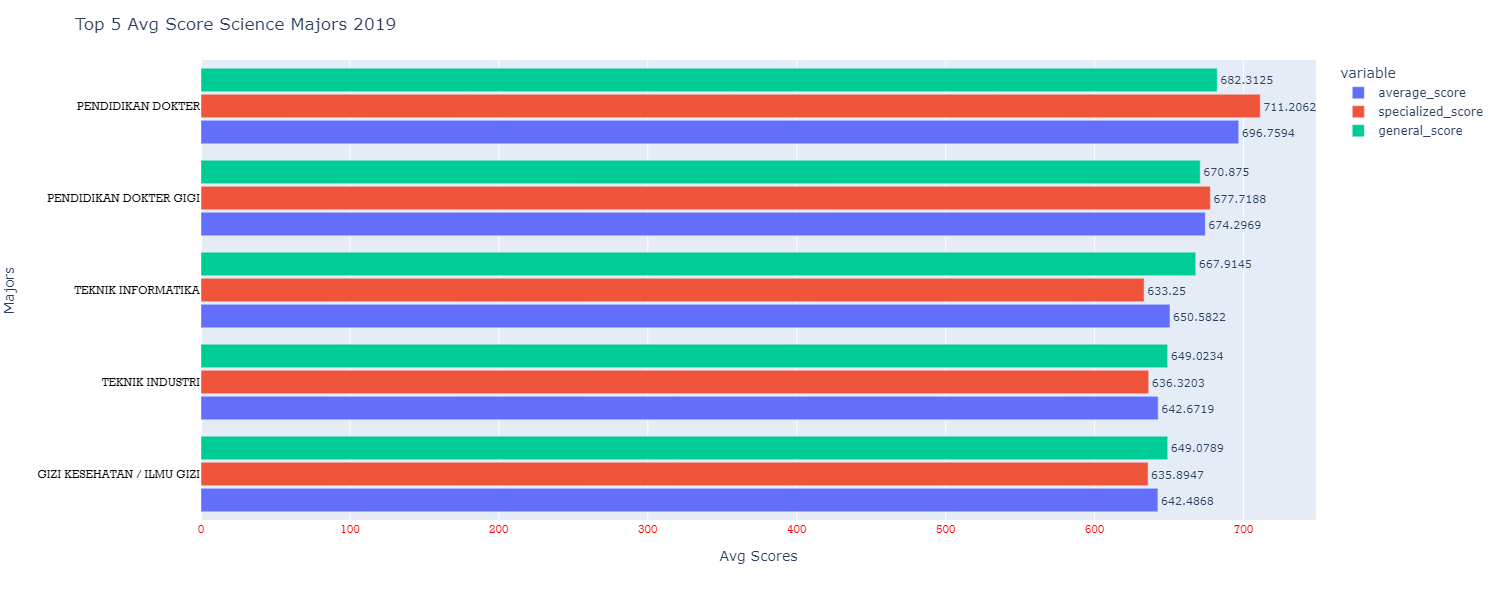

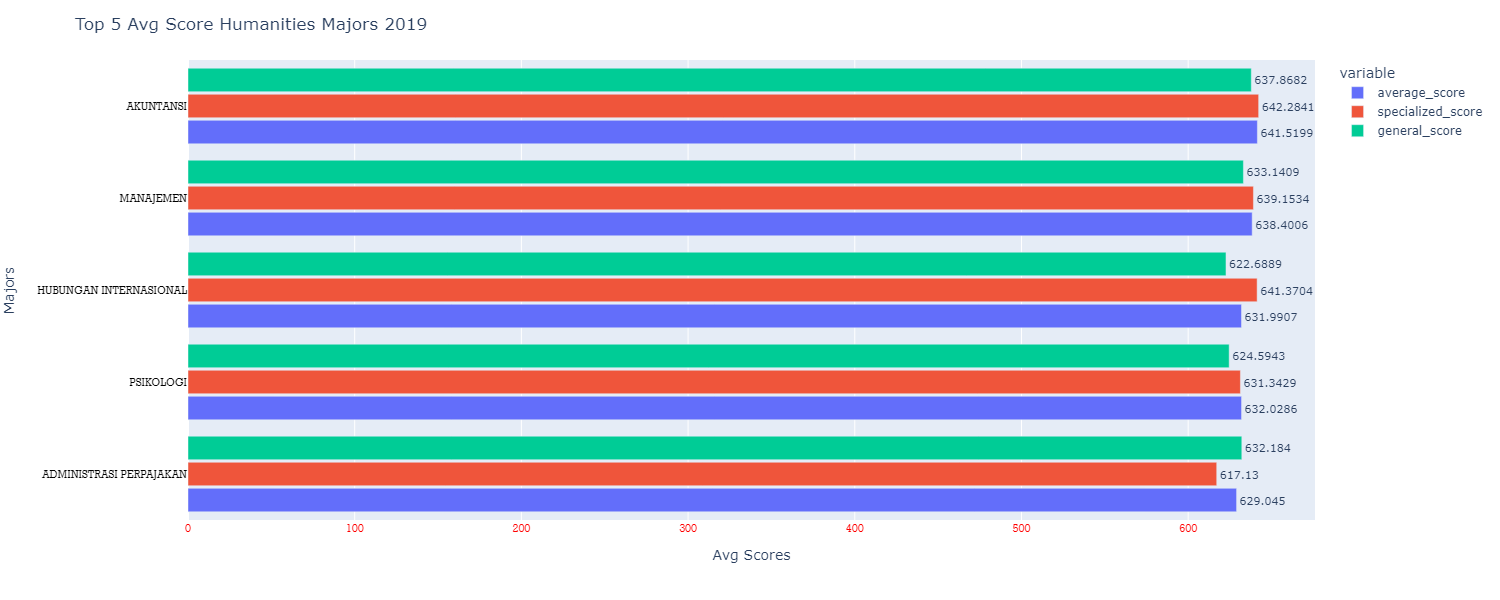

In [42]:
fig = px.bar(data_frame=df_univ_brawSc_clear.groupby('first_major').mean().sort_values('average_score',ascending=False).head(5).reset_index(),x=['average_score','specialized_score','general_score'],y='first_major',text_auto=True,barmode='group',height=600,width=1500)

fig.update_layout(showlegend=True,title='Top 5 Avg Score Science Majors 2019',xaxis_title='Avg Scores',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1,yaxis={'categoryorder':'total ascending'})
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=12))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=12))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show('png')

fig = px.bar(data_frame=df_univ_brawHm_clear.groupby('first_major').mean().sort_values('average_score',ascending=False).head(5).reset_index(),x=['average_score','specialized_score','general_score'],y='first_major',text_auto=True,barmode='group',height=600,width=1500)

fig.update_layout(showlegend=True,title='Top 5 Avg Score Humanities Majors 2019',xaxis_title='Avg Scores',yaxis_title='Majors',bargap=0.15,
bargroupgap=0.1,yaxis={'categoryorder':'total ascending'})
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=11))
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='red', size=11))
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=True)
fig.show('png')

In [43]:
df_univ_braw_dokter = df_univ_brawSc_clear.loc[df_univ_brawSc_clear['first_major']=='PENDIDIKAN DOKTER'].sort_values(by=['average_score','specialized_score','general_score'],ascending=False)

df_univ_braw_akuntansi = df_univ_brawHm_clear.loc[df_univ_brawHm_clear['first_major']=='AKUNTANSI'].sort_values(by=['average_score','specialized_score','general_score'],ascending=False)

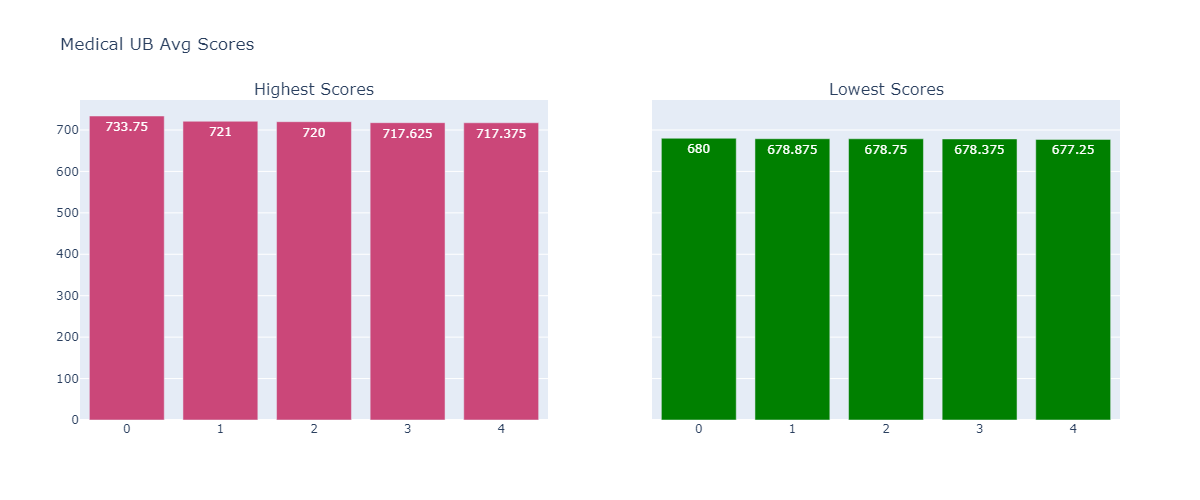

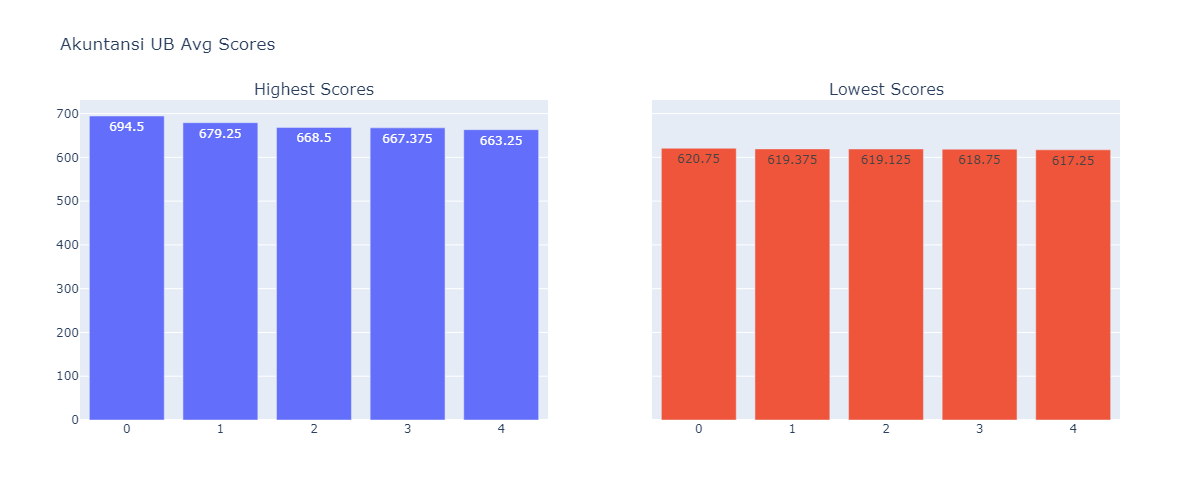

In [45]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True,subplot_titles=('Highest Scores','Lowest Scores'))

fig.add_trace(
    go.Bar(y=df_univ_braw_dokter.loc[:,'average_score',].iloc[:5],name='Highest Score',text=df_univ_braw_dokter.loc[:,'average_score'].iloc[:5],
        marker=dict(color=[1, 1, 1,1,1])),
    row=1, col=1,
)

fig.add_trace(
    go.Bar(y=df_univ_braw_dokter.loc[:,'average_score'].iloc[-5:],name='Lowest Score',text=df_univ_braw_dokter.loc[:,'average_score'].iloc[-5:],
            marker=dict(color=['green', 'green', 'green','green','green'])),
    row=1, col=2,
)
fig.update_layout(title_text='Medical UB Avg Scores ',showlegend=False,width=1200)
fig.show('png')


fig = make_subplots(rows=1, cols=2, shared_yaxes=True,subplot_titles=('Highest Scores','Lowest Scores'))

fig.add_trace(
    go.Bar(y=df_univ_braw_akuntansi.loc[:,'average_score',].iloc[:5],name='Highest Score',text=df_univ_braw_akuntansi.loc[:,'average_score'].iloc[:5]),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=df_univ_braw_akuntansi.loc[:,'average_score'].iloc[-5:],name='Lowest Score',text=df_univ_braw_akuntansi.loc[:,'average_score'].iloc[-5:]),
    row=1, col=2,
)
fig.update_layout(title_text='Akuntansi UB Avg Scores',showlegend=False,width=1200)
fig.show('png')



# fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=14))